<a href="https://colab.research.google.com/github/nathyesarav/python_projects/blob/main/APIconsumeTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                        Consumo de APIs - Resultado en tabla plana

Test:

1.- Consumir la API http://numbersapi.com/1..10

2.- Crear un dataFrame con los 1000 primeros números y descripciones

3.- Grabar la tabla en formato CSV

4.- Crear nueva columna con la longitud de la descripcion

5.- Mostrar en un histograma la distribución de longitudes de descripción


In [1]:
#__IMPORTAMOS TODAS LAS LIBRERIAS NECESARIAS__
import pandas as pd
import csv
import requests
import re
import ast
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
# 1.- Consumir la API http://numbersapi.com/1..10
APIurl = "http://numbersapi.com/1..10000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
APIresp.text

True
200
0:00:00.126882


'{\n "1": "1 is the number of Gods in monotheism.",\n "2": "2 is the first magic number in physics.",\n "3": "3 is the number of witches in William Shakespeare\'s Macbeth.",\n "4": "4 is the maximal number of horses in one row for carriage.",\n "5": "5 is the number of interlocked rings in the symbol of the Olympic Games, representing the number of inhabited continents represented by the Olympians (counting North America and South America as one continent).",\n "6": "6 is the number of sides on a cube.",\n "7": "7 is the approximate number of years in the lifespan of Irish Wolfhound dogs.",\n "8": "8 is the number of planets in the Solar System.",\n "9": "9 is the number of innings in a regulation, non-tied game of baseball.",\n "10": "10 is the Number of dots in a tetractys.",\n "11": "11 is the number of players in a field hockey team.",\n "12": "12 is the number of people who have walked on Earth\'s moon.",\n "13": "13 is the Youngest age a minor can rent or purchase a T rated game 

In [10]:
# 2.- Crear un dataFrame con los 1000 primeros números y descripciones
x = ast.literal_eval(APIresp.text)

# 3.- Grabar la tabla en formato CSV
# 4.- Crear nueva columna con la longitud de la descripcion
df = pd.DataFrame([[key, x[key]] for key in x.keys()], columns=['Number', 'Description'])
df

,Number,Description
0,1,1 is the number of Gods in monotheism.
1,2,2 is the first magic number in physics.
2,3,3 is the number of witches in William Shakespe...
3,4,4 is the maximal number of horses in one row f...
4,5,5 is the number of interlocked rings in the sy...
...,...,...
95,96,96 is the rating of Skyrim on metacritic.com.
96,97,97 is the number of leap days that the Gregori...
97,98,98 is the highest jersey number allowed in the...
98,99,99 is a common price ending in psychological p...


In [22]:
# Rename dataFrame columns
df.rename( columns={"Number" :'numero'}, inplace=True)
df.rename( columns={"Description" :'descripcion'}, inplace=True)

# Convert string to float
print (df.dtypes)
df.numero = df.numero.astype(float)
print (df.dtypes)

df

numero         object
descripcion    object
dtype: object
numero         float64
descripcion     object
dtype: object


,numero,descripcion
0,1.0,1 is the number of Gods in monotheism.
1,2.0,2 is the first magic number in physics.
2,3.0,3 is the number of witches in William Shakespe...
3,4.0,4 is the maximal number of horses in one row f...
4,5.0,5 is the number of interlocked rings in the sy...
...,...,...
95,96.0,96 is the rating of Skyrim on metacritic.com.
96,97.0,97 is the number of leap days that the Gregori...
97,98.0,98 is the highest jersey number allowed in the...
98,99.0,99 is a common price ending in psychological p...


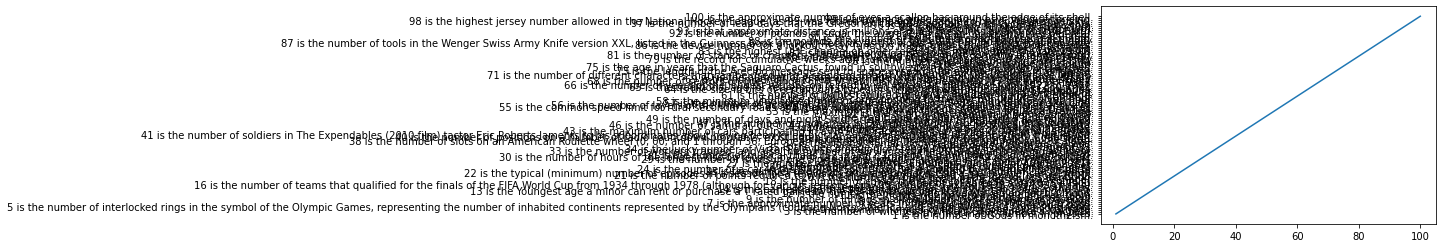

In [23]:
# 5.- Mostrar en un histograma la distribución de longitudes de descripción
plt.plot(df['numero'],df['descripcion'])

In [24]:
# Grabamos el resultado como CSV separado por comas
CSVfilename = "numbers1000.csv"
df.to_csv(CSVfilename, index=False)

In [25]:
print(df)

    numero                                        descripcion
0      1.0             1 is the number of Gods in monotheism.
1      2.0            2 is the first magic number in physics.
2      3.0  3 is the number of witches in William Shakespe...
3      4.0  4 is the maximal number of horses in one row f...
4      5.0  5 is the number of interlocked rings in the sy...
..     ...                                                ...
95    96.0      96 is the rating of Skyrim on metacritic.com.
96    97.0  97 is the number of leap days that the Gregori...
97    98.0  98 is the highest jersey number allowed in the...
98    99.0  99 is a common price ending in psychological p...
99   100.0  100 is the approximate number of eyes a scallo...

[100 rows x 2 columns]
